# EDA



In [3]:
import pandas as pd

# Load the listings dataset
listings_df = pd.read_csv('./listings.csv')

# Display the first few rows of the dataset
listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47


In [5]:
# Load the reviews dataset
reviews_df = pd.read_csv('./reviews.csv')

# Display the structure of the reviews dataset
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [6]:
import pandas as pd

# Load the listings dataset
listings_df = pd.read_csv('./listings.csv')

# Display the structure of the calendar dataset
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [4]:
# Load the calendar dataset
calendar_df = pd.read_csv('./calendar.csv')

# Display the structure of the calendar dataset
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


Step 1: Identify Missing Data

In [7]:
# Check for missing values in the listings dataset
missing_data_listings = listings_df.isnull().sum().sort_values(ascending=False)
missing_data_listings[missing_data_listings > 0]

has_availability                3585
license                         3585
neighbourhood_group_cleansed    3585
jurisdiction_names              3585
square_feet                     3529
monthly_price                   2697
weekly_price                    2693
security_deposit                2243
notes                           1975
interaction                     1554
access                          1489
neighborhood_overview           1415
host_about                      1309
transit                         1290
house_rules                     1192
cleaning_fee                    1107
space                           1057
review_scores_accuracy           823
review_scores_location           822
review_scores_value              821
review_scores_checkin            820
review_scores_communication      818
review_scores_cleanliness        818
review_scores_rating             813
reviews_per_month                756
last_review                      756
first_review                     756
x

In [9]:
import pandas as pd

# Load the listings dataset
listings_df = pd.read_csv('./listings.csv')

# Remove columns with too many missing values
columns_to_drop = ['has_availability', 'license', 'neighbourhood_group_cleansed', 'jurisdiction_names']
listings_df.drop(columns=columns_to_drop, inplace=True)

# Clean and convert numerical columns
numerical_columns = ['square_feet', 'monthly_price', 'weekly_price', 'security_deposit']
for column in numerical_columns:
    listings_df[column] = listings_df[column].replace('[\$,]', '', regex=True).astype(float)

# Fill numerical columns with median
for column in numerical_columns:
    listings_df[column].fillna(listings_df[column].median(), inplace=True)

# Fill text-based columns with 'Unknown'
text_columns = ['notes', 'interaction', 'access', 'neighborhood_overview', 'host_about', 'transit']
for column in text_columns:
    listings_df[column].fillna('Unknown', inplace=True)

# Verify that there are no more missing values
missing_data_listings = listings_df.isnull().sum().sort_values(ascending=False)
missing_data_listings[missing_data_listings > 0]

C:\Users\mak\AppData\Local\Temp\ipykernel_10916\2979265630.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_df[column].fillna(listings_df[column].median(), inplace=True)
C:\Users\mak\AppData\Local\Temp\ipykernel_10916\2979265630.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

house_rules                    1192
cleaning_fee                   1107
space                          1057
review_scores_accuracy          823
review_scores_location          822
review_scores_value             821
review_scores_checkin           820
review_scores_cleanliness       818
review_scores_communication     818
review_scores_rating            813
reviews_per_month               756
last_review                     756
first_review                    756
thumbnail_url                   599
medium_url                      599
xl_picture_url                  599
neighbourhood                   543
host_response_time              471
host_response_rate              471
host_acceptance_rate            471
host_neighbourhood              339
summary                         143
zipcode                          38
bathrooms                        14
market                           14
host_location                    11
bedrooms                         10
beds                        

In [17]:
from sklearn.impute import KNNImputer

# Load the listings dataset
listings_df = pd.read_csv('./listings.csv')

# Remove columns with too many missing values
columns_to_drop = ['has_availability', 'license', 'neighbourhood_group_cleansed', 'jurisdiction_names']
listings_df.drop(columns=columns_to_drop, inplace=True)

# Clean and convert numerical columns
numerical_columns = ['square_feet', 'monthly_price', 'weekly_price', 'security_deposit']
for column in numerical_columns:
    listings_df[column] = listings_df[column].replace('[\$,]', '', regex=True).astype(float)

# Fill numerical columns with median
for column in numerical_columns:
    listings_df[column].fillna(listings_df[column].median(), inplace=True)

# Fill text-based columns with 'Unknown'
text_columns = ['notes', 'interaction', 'access', 'neighborhood_overview', 'host_about', 'transit']
for column in text_columns:
    listings_df[column].fillna('Unknown', inplace=True)

# Remove rows with missing values if they are few
listings_df.dropna(thresh=len(listings_df.columns) - 2, inplace=True)

# Use KNN imputation for remaining missing values
imputer = KNNImputer(n_neighbors=5)
listings_df_imputed = pd.DataFrame(imputer.fit_transform(listings_df.select_dtypes(include=[float, int])), columns=listings_df.select_dtypes(include=[float, int]).columns)

# Combine imputed numerical data with original categorical data
listings_df.update(listings_df_imputed)

# Verify that there are no more missing values
missing_data_listings = listings_df.isnull().sum().sort_values(ascending=False)
missing_data_listings[missing_data_listings > 0]

C:\Users\mak\AppData\Local\Temp\ipykernel_10916\2777883457.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_df[column].fillna(listings_df[column].median(), inplace=True)
C:\Users\mak\AppData\Local\Temp\ipykernel_10916\2777883457.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

cleaning_fee              356
house_rules               322
space                     303
neighbourhood             163
summary                    69
host_neighbourhood         57
zipcode                     2
host_location               2
market                      2
property_type               2
bedrooms                    1
bathrooms                   1
review_scores_accuracy      1
dtype: int64

In [18]:
# Identify categorical columns
categorical_columns = listings_df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
listings_df_encoded = pd.get_dummies(listings_df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataframe
listings_df_encoded.head(2)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,last_review_2016-09-03,last_review_2016-09-04,last_review_2016-09-05,last_review_2016-09-06,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,require_guest_profile_picture_t,require_guest_phone_verification_t
1,6976,20160906204935,16701,1,1,42.292438,-71.135765,2,1.0,1.0,...,False,False,False,False,True,True,False,False,False,False
2,7651065,20160906204935,15396970,1,1,42.284512,-71.136258,2,1.5,1.0,...,False,False,False,False,False,True,False,False,True,False


In [22]:
import pandas as pd

# Load the listings dataset
listings_df = pd.read_csv('./listings.csv')

# Ensure the price column is properly cleaned and converted
if 'price' in listings_df.columns:
    listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate host duration
if 'host_since' in listings_df.columns:
    listings_df['host_since'] = pd.to_datetime(listings_df['host_since'])
    listings_df['host_duration'] = (pd.to_datetime('today') - listings_df['host_since']).dt.days

# Calculate average review score
review_score_columns = [
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value'
]
listings_df['review_scores_average'] = listings_df[review_score_columns].mean(axis=1)

# Load the calendar dataset
calendar_df = pd.read_csv('./calendar.csv')

# Calculate availability ratio
calendar_df['available'] = calendar_df['available'].apply(lambda x: 1 if x == 't' else 0)
availability_ratio = calendar_df.groupby('listing_id')['available'].mean().reset_index()
availability_ratio.columns = ['listing_id', 'availability_ratio']

# Merge availability ratio with listings dataset
listings_df = listings_df.merge(availability_ratio, left_on='id', right_on='listing_id', how='left')
listings_df.drop(columns=['listing_id'], inplace=True)

# Display the first few rows of the dataframe with new features
listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_duration,review_scores_average,availability_ratio
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,moderate,f,f,1,NaN,3340,NaN,0.000000
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,NaN,t,moderate,f,f,1,1.30,4382,9.500000,0.983562
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,NaN,f,moderate,t,f,1,0.47,5505,9.666667,0.873973


seaborn1. Pricing Strategy
Objective: Identify factors that significantly influence the price of an Airbnb listing in Boston.



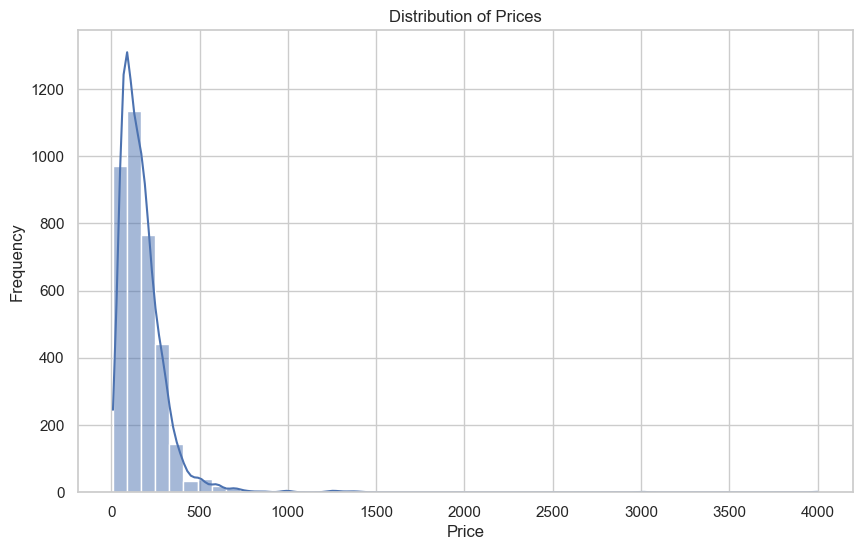

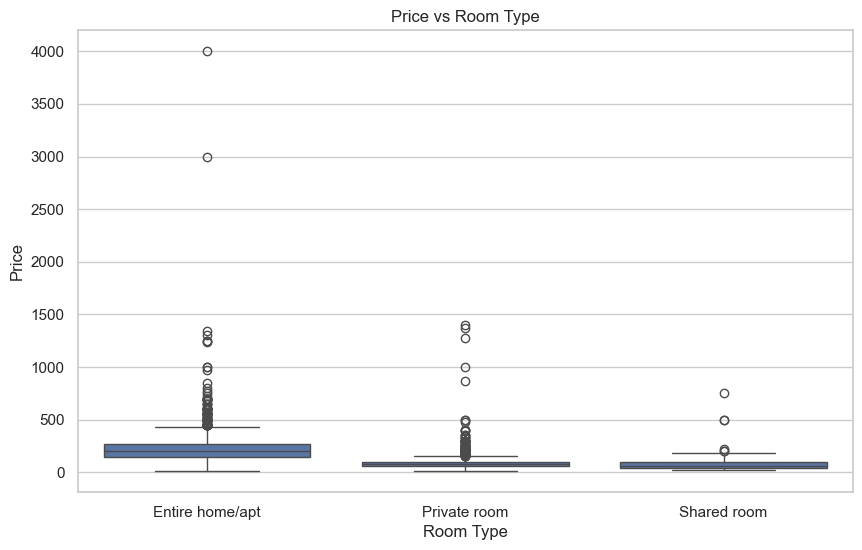

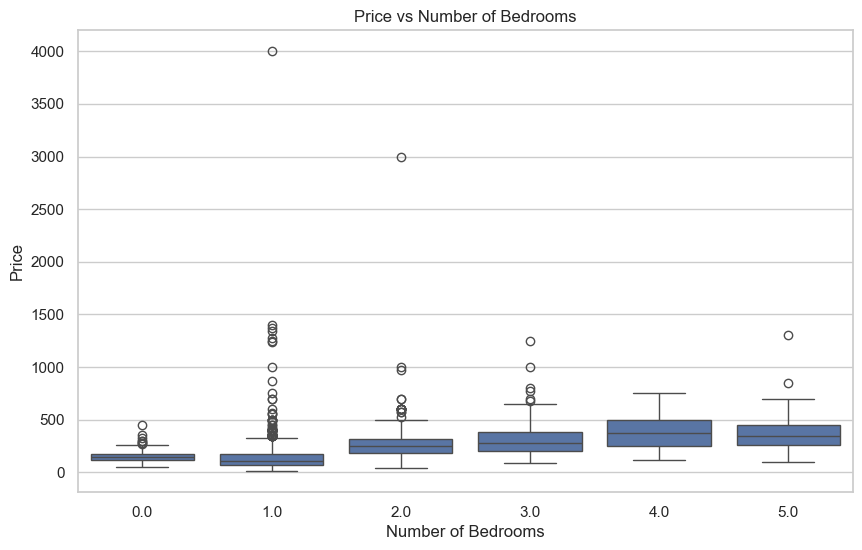

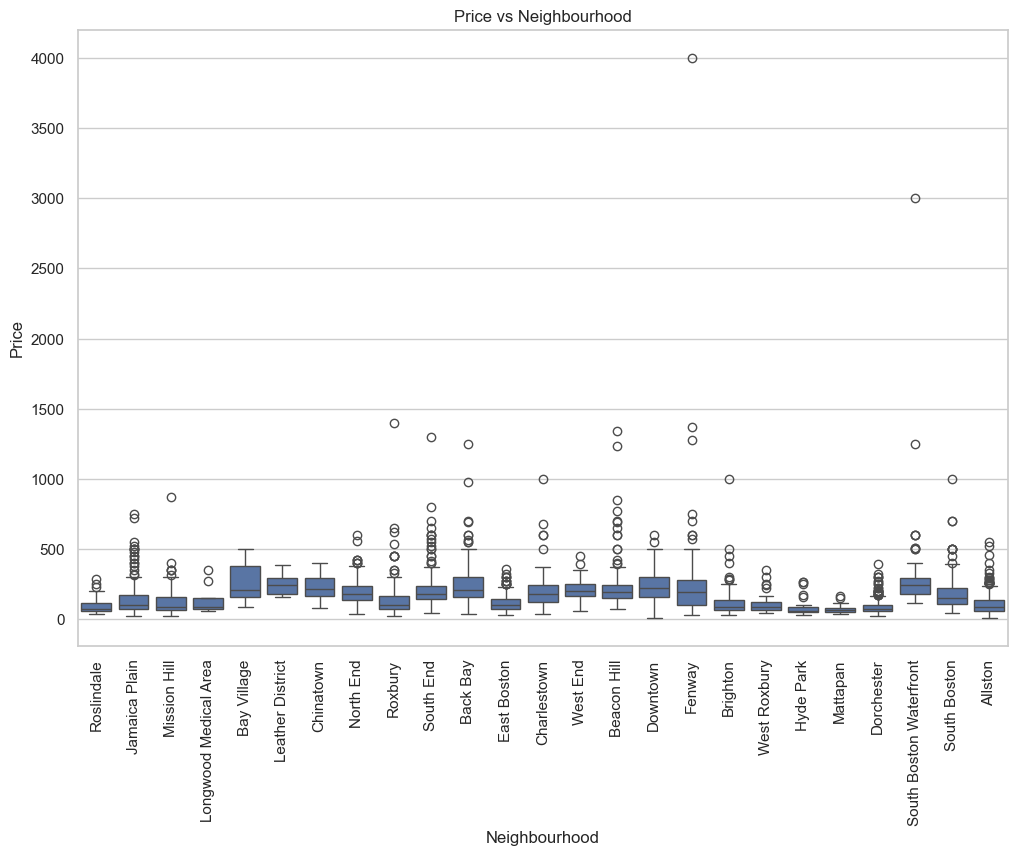

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Plot the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(listings_df['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot relationship between price and room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=listings_df)
plt.title('Price vs Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

# Plot relationship between price and number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=listings_df)
plt.title('Price vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Plot relationship between price and location (neighbourhood)
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=listings_df)
plt.title('Price vs Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

# Outcome
Distribution of Prices: The price distribution of Airbnb listings in Boston is right-skewed, indicating that most listings are priced lower, with a few high-priced outliers.
Price vs Room Type: Entire homes/apartments tend to have higher prices compared to private rooms and shared rooms.
Price vs Number of Bedrooms: Listings with more bedrooms generally have higher prices, showing a positive correlation between the number of bedrooms and price.
Price vs Neighbourhood: There is significant variation in prices across different neighborhoods, with some neighborhoods having consistently higher prices than others.

# 2. Occupancy Rates
# Objective: Analyze how different times of the year affect the occupancy rates of Airbnb listings in Boston.

In [27]:
import pandas as pd

# Load the calendar.csv file
calendar_df = pd.read_csv('./calendar.csv')

# Convert the date column to datetime format
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

# Create a new column to indicate occupancy (1 for occupied, 0 for available)
calendar_df['occupied'] = calendar_df['available'].apply(lambda x: 0 if x == 't' else 1)

# Display the first few rows of the dataframe
calendar_df.head()

,listing_id,date,available,price,occupied
0,12147973,2017-09-05,f,NaN,1
1,12147973,2017-09-04,f,NaN,1
2,12147973,2017-09-03,f,NaN,1
3,12147973,2017-09-02,f,NaN,1
4,12147973,2017-09-01,f,NaN,1


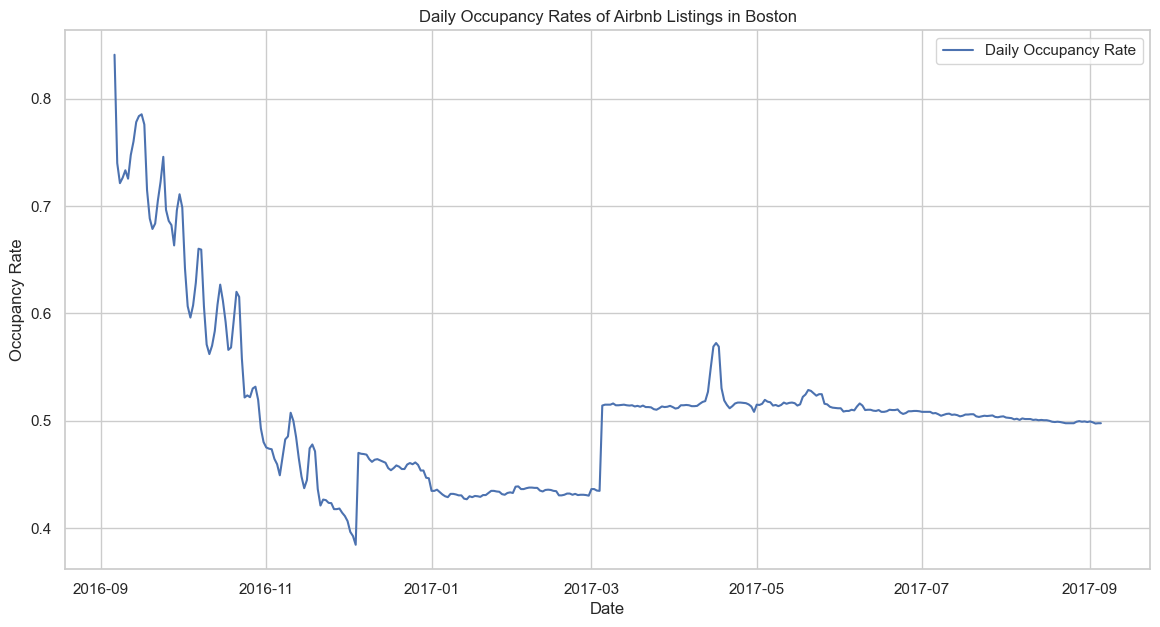

In [28]:
import matplotlib.pyplot as plt

# Aggregate the data to calculate daily occupancy rates
occupancy_rate_df = calendar_df.groupby('date')['occupied'].mean().reset_index()
occupancy_rate_df.rename(columns={'occupied': 'occupancy_rate'}, inplace=True)

# Plot the time series of daily occupancy rates
plt.figure(figsize=(14, 7))
plt.plot(occupancy_rate_df['date'], occupancy_rate_df['occupancy_rate'], label='Daily Occupancy Rate')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.title('Daily Occupancy Rates of Airbnb Listings in Boston')
plt.legend()
plt.show()

<Figure size 1400x1000 with 0 Axes>

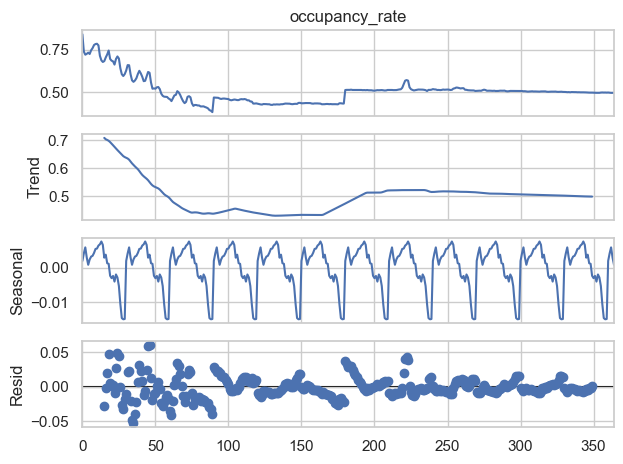

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition with a period of 30 days (monthly seasonality)
result = seasonal_decompose(occupancy_rate_df['occupancy_rate'], model='additive', period=30)

# Plot the decomposed components
plt.figure(figsize=(14, 10))
result.plot()
plt.show()

# Outcome 
The seasonal decomposition of the daily occupancy rates reveals three main components: trend, seasonal, and residual. The trend component shows the overall direction of the occupancy rates over time, indicating periods of increasing or decreasing occupancy. The seasonal component captures regular patterns that repeat approximately every 30 days, highlighting monthly seasonality in the data. The residual component represents the irregular fluctuations that are not explained by the trend or seasonal components. This decomposition helps us understand the underlying patterns in the occupancy rates, which will be useful for forecasting in the next step.

# 3. Customer Satisfaction
Objective: Identify key factors that contribute to higher customer satisfaction ratings for Airbnb listings in Boston.

In [33]:
import pandas as pd

# Load the datasets
listings_df = pd.read_csv('./listings.csv')
reviews_df = pd.read_csv('./reviews.csv')

# Merge the datasets on listing_id
merged_df = pd.merge(reviews_df, listings_df, left_on='listing_id', right_on='id')

# Drop two unimportant columns: 'scrape_id' and 'last_scraped'
merged_df = merged_df.drop(columns=['scrape_id', 'last_scraped'])

# Display the first few rows of the updated dataset
merged_df.head(3)

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,name,summary,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,1178162,https://www.airbnb.com/rooms/1178162,Private Room Great Location Boston,NaN,...,9.0,f,NaN,NaN,f,strict,f,f,4,5.35
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,1178162,https://www.airbnb.com/rooms/1178162,Private Room Great Location Boston,NaN,...,9.0,f,NaN,NaN,f,strict,f,f,4,5.35
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,1178162,https://www.airbnb.com/rooms/1178162,Private Room Great Location Boston,NaN,...,9.0,f,NaN,NaN,f,strict,f,f,4,5.35


In [47]:
import pandas as pd
import plotly.express as px

# Load the datasets
calendar_df = pd.read_csv('./calendar.csv')
listings_df = pd.read_csv('./listings.csv')
reviews_df = pd.read_csv('./reviews.csv')

# Merge the datasets on 'listing_id'
merged_df = pd.merge(listings_df, reviews_df, left_on='id', right_on='listing_id')

# Convert price to numeric after removing the dollar sign and commas
merged_df['price'] = merged_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Visualize the relationship between review scores rating and price
fig1 = px.scatter(merged_df, x='price', y='review_scores_rating', title='Review Scores Rating vs. Price')
fig1.show()

# Visualize the relationship between review scores rating and number of reviews
fig2 = px.scatter(merged_df, x='number_of_reviews', y='review_scores_rating', title='Review Scores Rating vs. Number of Reviews')
fig2.show()

# Visualize the relationship between review scores rating and room type
fig3 = px.box(merged_df, x='room_type', y='review_scores_rating', title='Review Scores Rating vs. Room Type')
fig3.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed